# Rede neural para gênero

Saídas da rede:<br>
- 0: Masculino
- 1: Feminino

## Configurando o treinamento

In [1]:
import numpy as np 

model_path = 'models/'
data_dir = 'data/'
data_path = data_dir + 'train_test/'

model_name = 'gênero'

n_epochs = 20
patience = 5
input_shape = (75,75,1)
output_shape = 1

## Carregando os dados

In [2]:
from PIL import Image
import os 

def load_data(data_type):
    
    if data_type == 'train':
        data_tag = '0'
    elif data_type == 'valid':
        data_tag = '1'
    else:
        data_tag = '2'
        
    files = os.listdir(data_path)    
    files = [file for file in files if file.split('.')[1] == data_tag]
    
    y = np.array([int(file.split('_')[1]) for file in files])
    
    files = [data_path + file for file in files] 
    x = [np.array(Image.open(file)) for file in files]
    
    x = [(image - image.min())/(image.max()-image.min()) for image in x]
    
    x = np.expand_dims(x, axis=3)
    
    return x,y

In [3]:
X_train, y_train = load_data('train')
X_val, y_val = load_data('valid')

In [15]:
X_train.min(),X_train.max(),X_val.min(),X_val.max()

(0.0, 1.0, 0.0, 1.0)

## A rede neural

In [2]:
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(BatchNormalization(input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(BatchNormalization(input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model = Sequential()
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(BatchNormalization(input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(BatchNormalization(input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model = Sequential()
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(BatchNormalization(input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(BatchNormalization(input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten()) 
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_shape, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


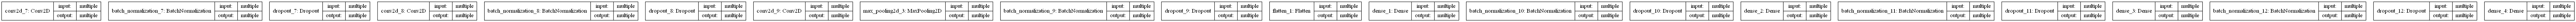

In [6]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image as im

data = plot_model(model, show_shapes=True, show_layer_names=True)
im('model.png')

## Treinamento inicial

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    ModelCheckpoint(
        model_path+model_name+'_{accuracy:.3f}-{val_accuracy:.3f}-{epoch:02d}.h5',
        monitor='val_accuracy',
        verbose=1,
        save_best_only=True),
    EarlyStopping('val_accuracy',patience = patience),
]

history = model.fit(
        x = X_train,y=y_train,
        epochs=n_epochs,
        validation_data=(X_val,y_val),
        callbacks=callbacks
)

Train on 14151 samples, validate on 6604 samples
Epoch 1/20
14151/14151 [==============================] - 25s 2ms/step - loss: 0.7274 - accuracy: 0.5988 - val_loss: 0.7152 - val_accuracy: 0.5227

Epoch 00001: val_accuracy improved from -inf to 0.52271, saving model to models/gênero_0.599-0.523-01.h5
Epoch 2/20
14151/14151 [==============================] - 23s 2ms/step - loss: 0.5729 - accuracy: 0.7071 - val_loss: 0.5400 - val_accuracy: 0.6884

Epoch 00002: val_accuracy improved from 0.52271 to 0.68837, saving model to models/gênero_0.707-0.688-02.h5
Epoch 3/20
14151/14151 [==============================] - 24s 2ms/step - loss: 0.5103 - accuracy: 0.7634 - val_loss: 0.9080 - val_accuracy: 0.5531

Epoch 00003: val_accuracy did not improve from 0.68837
Epoch 4/20
14151/14151 [==============================] - 24s 2ms/step - loss: 0.4665 - accuracy: 0.7970 - val_loss: 0.4263 - val_accuracy: 0.7815

Epoch 00004: val_accuracy improved from 0.68837 to 0.78150, saving model to models/gênero_0

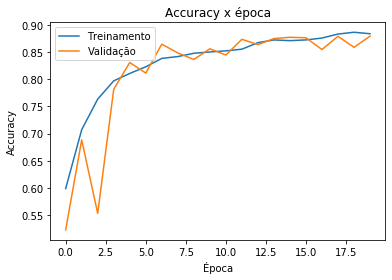

In [11]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy x época')
plt.ylabel('Accuracy')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()

## Selecionando o melhor modelo

In [12]:
from keras.models import load_model

model = load_model('models/gênero_0.872-0.875-14.h5')

## Ajustando o treinamento com o dataset de validação

In [13]:
from keras.models import load_model
model.fit(
    x = X_val,
    y=y_val,
    epochs=1,
)

Epoch 1/1
6604/6604 [==============================] - 11s 2ms/step - loss: 0.3865 - accuracy: 0.8452


## Testando contra o dataset de teste


In [14]:
X_test, y_test = load_data('test')

#### Juntando dados de treinamento e validação em um único dataset para comparação

In [15]:
X_train = np.append(X_train,X_val,axis=0)
y_train = np.append(y_train,y_val,axis=0)

del X_val, y_val

In [16]:
acc_train = model.evaluate(x=X_train, y=y_train, verbose=1)[1]
acc_test = model.evaluate(x=X_test, y=y_test, verbose=1)[1]

print('CNN:')
print("ACC treinamento", np.round(acc_train,3))
print("ACC teste", np.round(acc_test,3))

2831/2831 [==============================] - 1s 422us/step
CNN:
ACC treinamento 0.89
ACC teste 0.878


#### Comparando com modelos dummy

- Estragégia dummy 1: chutar sempre a maioria <br>
- Estragégia dummy 2: chute aleatório

In [17]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([10845,  9910], dtype=int64))

In [18]:
from sklearn.metrics import accuracy_score

def evaluate(train_pred,test_pred):
    
    acc_train = accuracy_score(y_train,train_predictions)
    acc_test = accuracy_score(y_test,test_predictions)
    
    print("ACC treinamento", np.round(acc_train,3))
    print("ACC teste", np.round(acc_test,3))
    print()
    
    
most_frequent = 0
train_predictions = [most_frequent] * y_train.shape[0]
test_predictions = [most_frequent] * y_test.shape[0]
print('Estratégia 1 (maioria):')
evaluate(train_predictions,test_predictions)

train_predictions = [np.random.randint(0,2) for i in range(y_train.shape[0])]
test_predictions = [np.random.randint(0,2) for i in range(y_test.shape[0])]
print('Estratégia 2 (aleatório):')
evaluate(train_predictions,test_predictions)

Estratégia 1 (maioria):
ACC treinamento 0.523
ACC teste 0.522

Estratégia 2 (aleatório):
ACC treinamento 0.499
ACC teste 0.514



## Ajustando o treinamento com o dataset de teste

In [19]:
model.fit(
    x = X_test,y=y_test,
    epochs=1,
)

Epoch 1/1
2831/2831 [==============================] - 4s 2ms/step - loss: 0.3758 - accuracy: 0.8463


## Salvando o modelo final

In [20]:
model.save(model_path + model_name + '_final.h5')